In [186]:
from math import floor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import TimeSeriesSplit


from sklearn import tree
import datetime as datetime


import quandl as ql
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [187]:
raw = pd.read_csv('BITFINEX_ETHUSD, 1D.csv')

In [188]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1736 non-null   object 
 1   open    1736 non-null   float64
 2   high    1736 non-null   float64
 3   low     1736 non-null   float64
 4   close   1736 non-null   float64
 5   MA      1687 non-null   float64
 6   MA.1    1717 non-null   float64
dtypes: float64(6), object(1)
memory usage: 95.1+ KB


In [189]:
data = pd.DataFrame(raw['close'])

In [190]:
data.rename(columns={'close':'price'},inplace=True)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1736 non-null   float64
dtypes: float64(1)
memory usage: 13.7 KB


In [192]:
data['SMA1']=data['price'].rolling(21).mean()

In [193]:
data['SMA2']=data['price'].rolling(120).mean()

In [194]:
data.tail()

,price,SMA1,SMA2
1731,1818.2,1765.598491,1289.645296
1732,1843.9,1764.198491,1299.877796
1733,1919.3,1770.031824,1310.980046
1734,1967.8,1776.598491,1322.395046
1735,2071.5,1791.017538,1334.518713


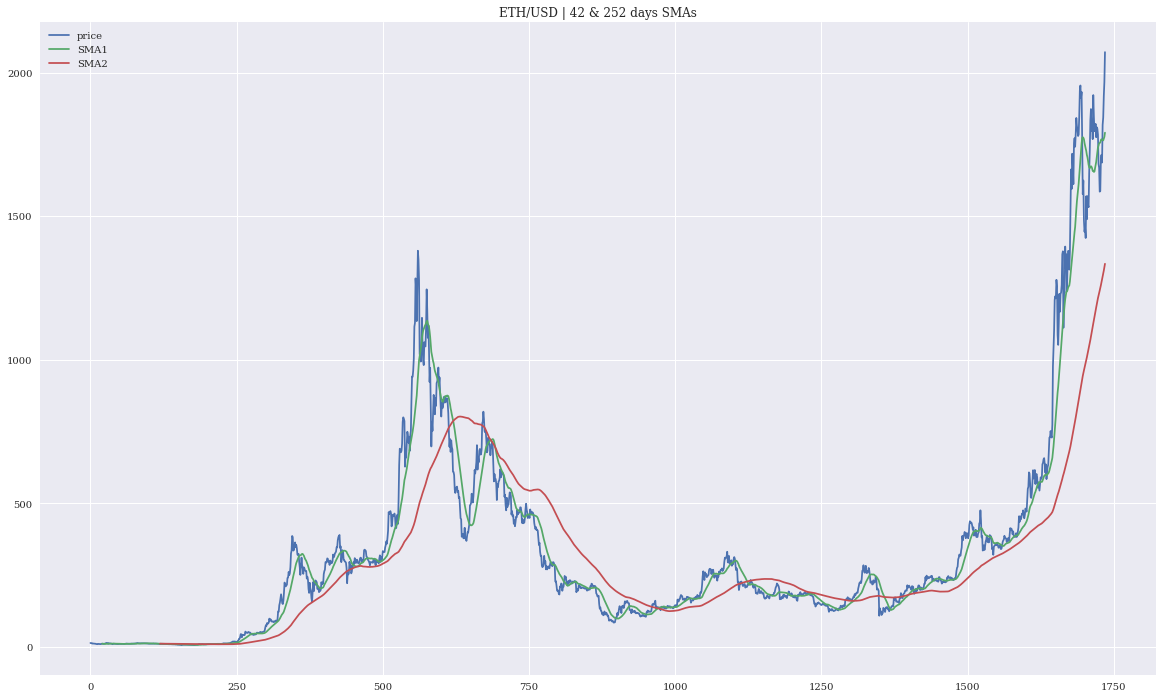

In [196]:
data.plot(title='ETH/USD | 42 & 252 days SMAs',figsize=(20,12));

In [197]:
data['position']=np.where(data['SMA1'] > data['SMA2'],
                         1,-1)

In [198]:
data.dropna(inplace=True)

<AxesSubplot:title={'center':'Market Positioning'}>

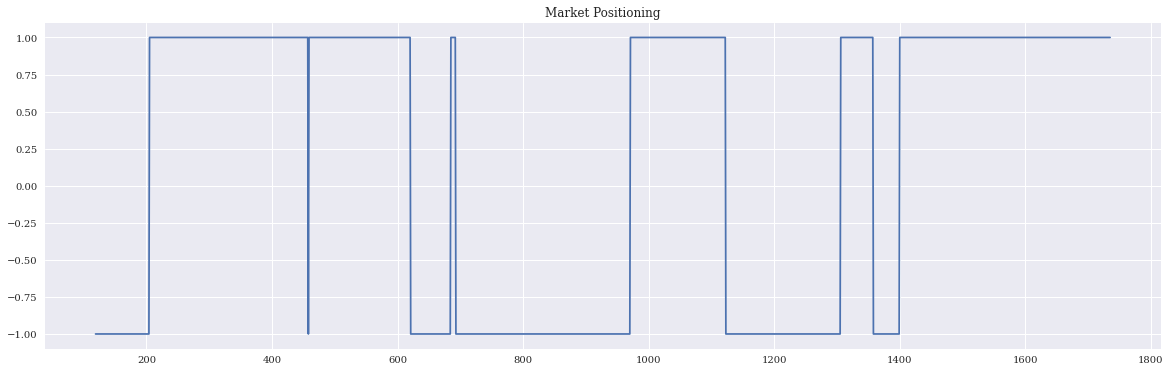

In [199]:
data['position'].plot(ylim=[-1.1,1.1],
                     title ='Market Positioning',
                     figsize=(20,6))

In [200]:
data['returns'] = np.log(data['price']/data['price'].shift(1))

In [201]:
data.tail()

,price,SMA1,SMA2,position,returns
1731,1818.2,1765.598491,1289.645296,1,0.074777
1732,1843.9,1764.198491,1299.877796,1,0.014036
1733,1919.3,1770.031824,1310.980046,1,0.040078
1734,1967.8,1776.598491,1322.395046,1,0.024956
1735,2071.5,1791.017538,1334.518713,1,0.051357


<AxesSubplot:>

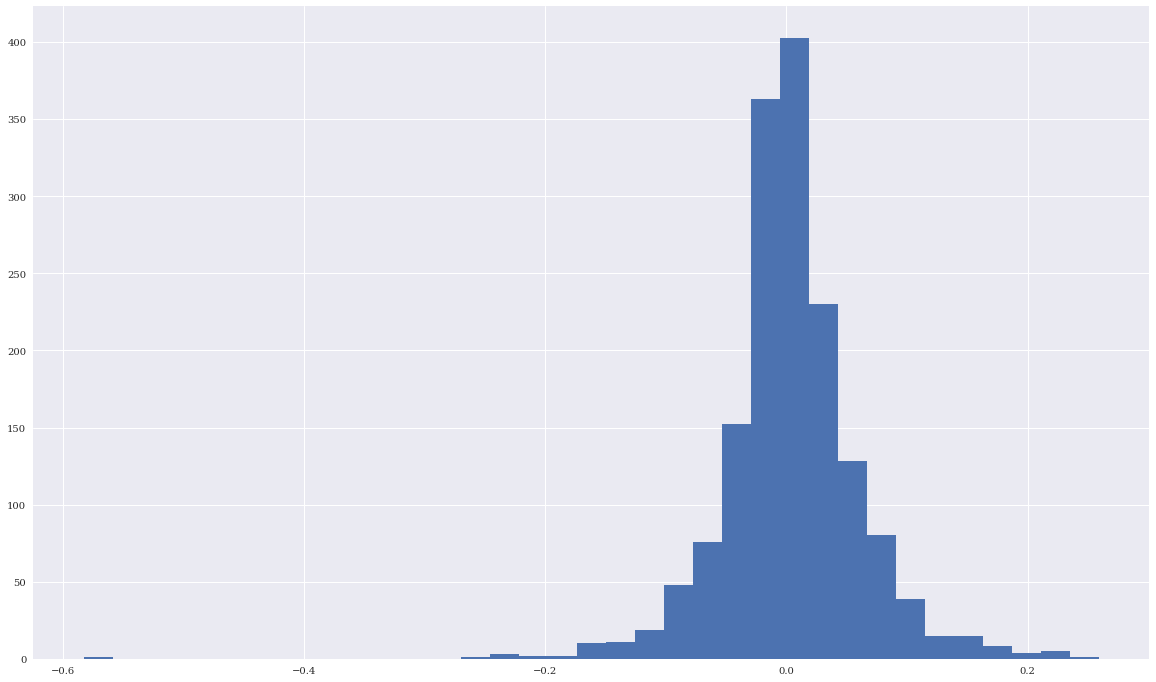

In [202]:
data['returns'].hist(bins=35, figsize=(20,12))

# What does the profit profile look like if we trade this strategy
shift position column by one day to indicate our implied position for the next day
multiply our returns column by our position column to simulate what our strategy would have returned on that day

In [203]:
data['strategy'] = data['position'].shift(1)*data['returns']

In [204]:
data[['returns','strategy']].sum()

returns     5.296629
strategy    7.265435
dtype: float64

In [205]:
data[['returns','strategy']].sum().apply(np.exp)

returns      199.662651
strategy    1430.007200
dtype: float64

<AxesSubplot:>

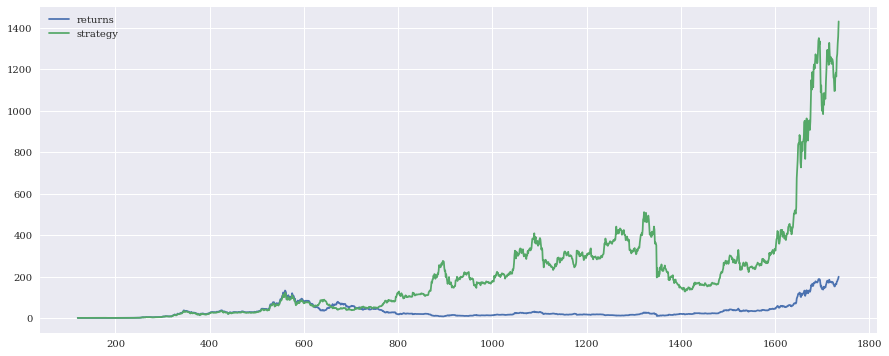

In [206]:
data[['returns', 'strategy']].dropna().cumsum(
                     ).apply(np.exp).plot(figsize=(15, 6))

# Annualized Mean Return

In [207]:
data[['returns', 'strategy']].mean()* 252

returns     0.825960
strategy    1.132976
dtype: float64

# Annualized Standard Deviation

In [208]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.906363
strategy    0.905044
dtype: float64

# Compute cumulative Return¶

In [209]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

# Compute cumulative max

In [210]:
data['cummax'] =  data['cumret'].cummax()

# Compute the max drawdown

<AxesSubplot:>

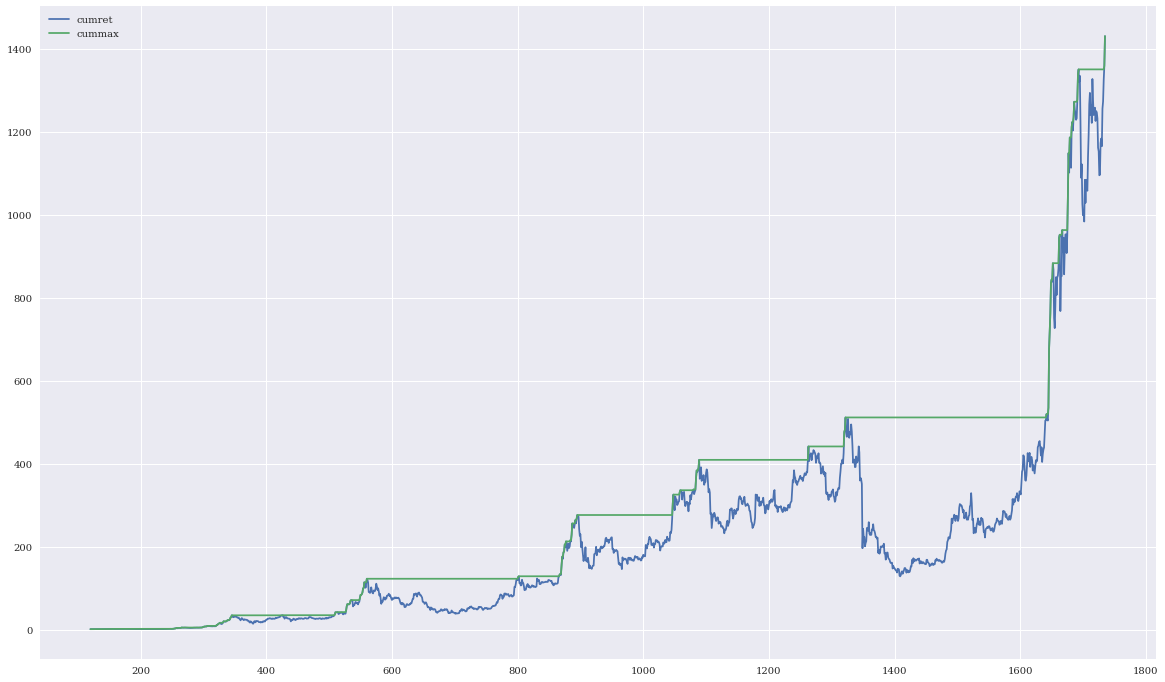

In [211]:
data[['cumret', 'cummax']].dropna().plot(figsize=(20, 12))

In [212]:
drawdown = data['cummax'] - data['cumret'] 

In [213]:
drawdown.max()

382.9796370869513

# Compute max duration of drawdown

In [214]:
#find the dates where drawdown is equal to 0
#these are the moments when our cumulative returns and the max cumulative returns are the same
temp = drawdown[drawdown == 0]

In [215]:
#compute the time difference between each of these moments in time

periods = (temp.index[1:].to_pydatetime() -
                    temp.index[:-1].to_pydatetime())

AttributeError: 'Int64Index' object has no attribute 'to_pydatetime'

In [216]:
eth_usd = sma.SMAVectorBacktester(data,'close', 42, 252, '2017-01-02','2019-01-11')
ethusd.run_strategy()

NameError: name 'sma' is not defined